# Alcoholytics
## Predicts the chances of a student becoming an alcoholic
### 
### By Alvin Alaphat, Luke Marushack, Luke Miller, Jon Abbot

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary 
education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - 1 hour)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target

# Data Pre-processing

## Luke Miller

In [130]:
d = {'F': 0,'M': 1,'U': 1, 'R': 0,'GT3': 0,'LE3': 1,'A': 0,'T': 1,
 'at_home': 0,
  'health': 1,
  'other': 2,
  'services': 3,
  'teacher': 4,
  'course': 0,
  'home': 1,
  'reputation': 3,
  'mother': 1,
  'father': 0,
    'yes': 1,
     'no': 0}

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [90]:
students_math = pd.read_csv('student-mat.csv')
students_port = pd.read_csv('student-por.csv')

In [91]:
students = pd.concat([students_math,students_port])
stuviz = pd.concat([students_math,students_port])

### Overview of our dataset 

In [92]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Check out data types and check for null values

In [93]:
print('Data Types and Checking for Null')
students.info()

Data Types and Checking for Null
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null 

In [94]:
students.drop('school', axis=1, inplace=True)

In [95]:
# Functions to clean the data
def sex(x):
    if str(x) == 'F':
        return 0
    else:
        return 1
    
def address(x):
    if str(x) == 'U':
        return 0
    else:
        return 1

def famsize(x):
    if str(x) == 'LE3':
        return 0
    else:
        return 1

In [96]:
students['sex'] = students['sex'].apply(sex)
students['address'] = students['address'].apply(address)
students['famsize'] = students['famsize'].apply(famsize)

### We cleaned the data and converted it from nominal features to numerical using a label encoder

In [97]:
lb_make = LabelEncoder()

In [98]:
students['Mjob'] = lb_make.fit_transform(students['Mjob'])
students['Fjob'] = lb_make.fit_transform(students['Fjob'])
students['reason'] = lb_make.fit_transform(students['reason'])
students['health'] = lb_make.fit_transform(students['health'])
students['internet'] = lb_make.fit_transform(students['internet'])
students['romantic'] = lb_make.fit_transform(students['romantic'])
students['Pstatus'] = lb_make.fit_transform(students['Pstatus'])
students['guardian'] = lb_make.fit_transform(students['guardian'])
students['schoolsup'] = lb_make.fit_transform(students['schoolsup'])
students['famsup'] = lb_make.fit_transform(students['famsup'])
students['paid'] = lb_make.fit_transform(students['paid'])
students['activities'] = lb_make.fit_transform(students['activities'])
students['nursery'] = lb_make.fit_transform(students['nursery'])
students['higher'] = lb_make.fit_transform(students['higher'])

# Visualizations

### Not many high schoolers drink heavily and they usually drink more on the weekend

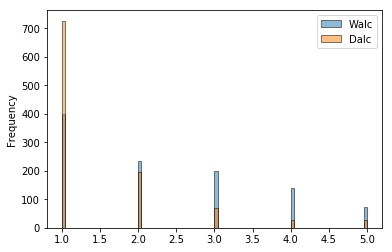

In [100]:
students['Walc'].plot(kind='hist',bins=100,ec='black', alpha=.5, legend=True)
students['Dalc'].plot(kind='hist',bins=100,ec='black', alpha=.5, legend=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 <a list of 32 Text yticklabel objects>)

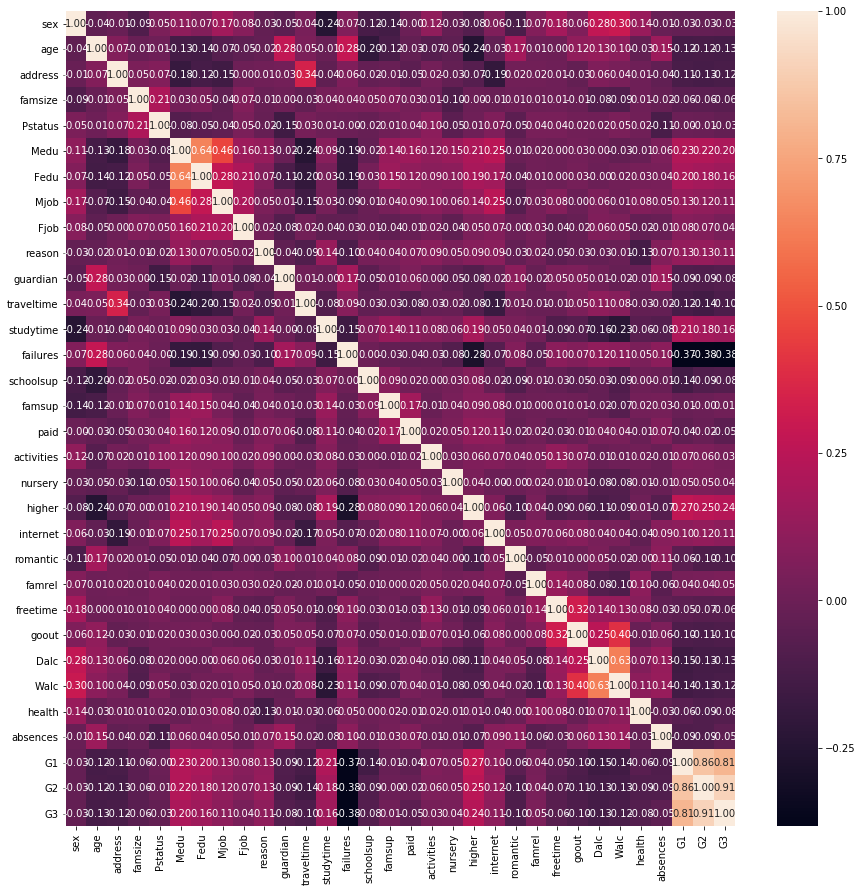

In [101]:
plt.figure(figsize=(15,15))
sns.heatmap(students.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [102]:
stuviz.drop('school', inplace=True, axis=1)

In [144]:
ages = students["age"].value_counts()
ages

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

### Age vs. Drinking
### Students drink a lot more once they hit legal age and there's a slight increase as they progress through their teen years. 

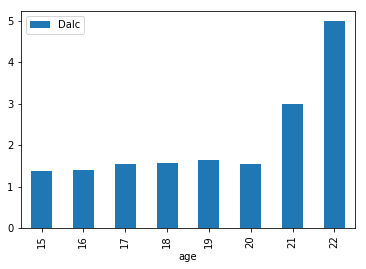

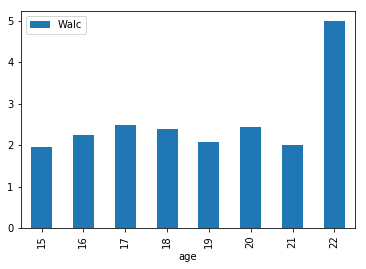

In [147]:
age_metrics = st.groupby('age').mean()
age_metrics.plot.bar(y = 'Dalc')
age_metrics.plot.bar(y = 'Walc')

### Surprisingly, the intensity at which students drink stays relatively similar regardless of age.

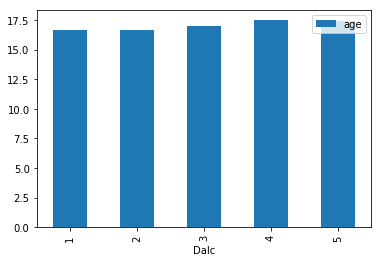

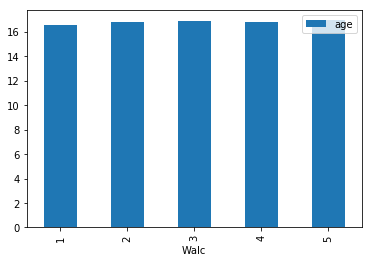

In [148]:
walc_metrics = st.groupby('Walc').mean()
dalc_metrics = st.groupby('Dalc').mean()
dalc_metrics.plot.bar(y = 'age')
walc_metrics.plot.bar(y = 'age')

## Luke Marushack

### WALC VS REASON
#### Students who choose the reason for attending their school as "courses" or "reputation," (which we assume means they are more academically inclined) drink less on the weekend, on average.

2.313953488372093 2.2627906976744185 2.1733870967741935 2.5555555555555554


Text(0, 0.5, 'Drinks Weekend')

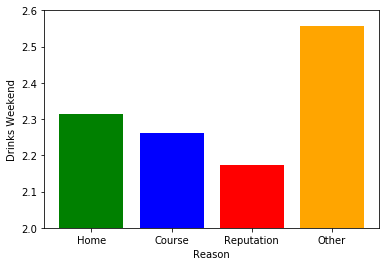

In [231]:
home = 0
home_drinks = 0
course = 0
course_drinks = 0
reputation = 0
reputation_drinks = 0
other = 0
other_drinks = 0
with_names = stuviz
with_names['Walc'] = st['Walc']
with_names['Dalc'] = st['Dalc']

for i in range(len(with_names.index)):
    if with_names.iloc[i]['reason'] == 'home':
        home += 1
        home_drinks += (with_names.iloc[i]['Walc'])
    elif with_names.iloc[i]['reason'] == 'course':
        course += 1
        course_drinks += (with_names.iloc[i]['Walc'])
    elif with_names.iloc[i]['reason'] == 'reputation':
        reputation += 1
        reputation_drinks += (with_names.iloc[i]['Walc']) 
    else:
        other += 1
        other_drinks += (with_names.iloc[i]['Walc'])

home_drinks /= home
course_drinks /= course
reputation_drinks /= reputation
other_drinks /= other

colors = ['green', 'blue', 'red', 'orange']

plt.bar(['Home', 'Course', 'Reputation', 'Other'], 
        [home_drinks, course_drinks, reputation_drinks, other_drinks],
        color = colors)
print(home_drinks, course_drinks, reputation_drinks, other_drinks)
plt.ylim(top = 2.6, bottom=2)
plt.xlabel('Reason')
plt.ylabel('Drinks Weekend')

## The same trend goes for the weekdays.

1.565891472868217 1.458139534883721 1.3266129032258065 1.8518518518518519


Text(0, 0.5, 'Drinks Weekdays')

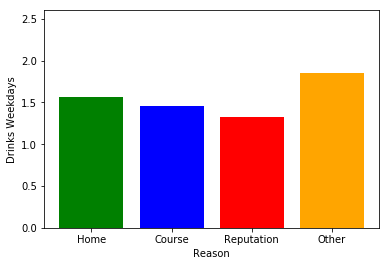

In [234]:
home = 0
home_drinks = 0
course = 0
course_drinks = 0
reputation = 0
reputation_drinks = 0
other = 0
other_drinks = 0

for i in range(len(with_names.index)):
    if with_names.iloc[i]['reason'] == 'home':
        home += 1
        home_drinks += (with_names.iloc[i]['Dalc'])
    elif with_names.iloc[i]['reason'] == 'course':
        course += 1
        course_drinks += (with_names.iloc[i]['Dalc'])
    elif with_names.iloc[i]['reason'] == 'reputation':
        reputation += 1
        reputation_drinks += (with_names.iloc[i]['Dalc']) 
    else:
        other += 1
        other_drinks += (with_names.iloc[i]['Dalc'])

home_drinks /= home
course_drinks /= course
reputation_drinks /= reputation
other_drinks /= other

colors = ['green', 'blue', 'red', 'orange']

plt.bar(['Home', 'Course', 'Reputation', 'Other'], 
        [home_drinks, course_drinks, reputation_drinks, other_drinks],
        color = colors)
print(home_drinks, course_drinks, reputation_drinks, other_drinks)
plt.ylim(top = 2.6)
plt.xlabel('Reason')
plt.ylabel('Drinks Weekdays')

## Students with more absences seem to be those that drink more. (Direct Relationship)

<BarContainer object of 4 artists>

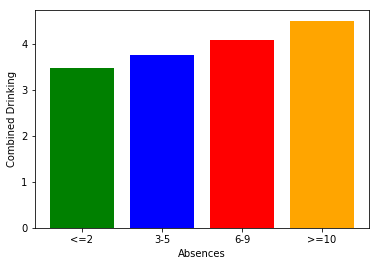

In [237]:
lte2 = 0
lte2_drinks = 0
three_to_five = 0
ttf_drinks = 0
six_to_nine = 0
stn_drinks = 0
gteten = 0
gteten_drinks = 0

for i in range(len(with_names.index)):
    if with_names.iloc[i]['absences'] <= 2:
        lte2 += 1
        lte2_drinks += (with_names.iloc[i]['Dalc'] + with_names.iloc[i]['Walc'])
    elif with_names.iloc[i]['absences'] <= 5:
        three_to_five += 1
        ttf_drinks += (with_names.iloc[i]['Dalc'] + with_names.iloc[i]['Walc'])
    elif with_names.iloc[i]['absences'] <= 9:
        six_to_nine += 1
        stn_drinks += (with_names.iloc[i]['Dalc'] + with_names.iloc[i]['Walc']) 
    else:
        gteten += 1
        gteten_drinks += (with_names.iloc[i]['Dalc'] + with_names.iloc[i]['Walc'])
        
gteten_drinks /= gteten
stn_drinks /= six_to_nine
ttf_drinks /= three_to_five
lte2_drinks /= lte2

colors = ['green', 'blue', 'red', 'orange']
plt.xlabel('Absences')
plt.ylabel('Combined Drinking')
plt.bar(['<=2', '3-5', '6-9', '>=10'], 
        [lte2_drinks, ttf_drinks, stn_drinks, gteten_drinks],
        color = colors)

## Observations about students that are heavy drinkers

### 1. Mother and father on average never made it past the 9th grade
### 2. Students typically study only 1.5 hours per week, on average
### 3. They go out with friends a lot
### 4. They have a lot of free time
### 5. Have about 7 absences a year - compared to average of 4 for those who don't drink during week

In [103]:
st = stuviz
st[(st['Dalc'] >= 3) & (st['Walc'] >= 4)].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,16.956044,2.747253,2.516484,1.736264,1.637363,0.362637,3.890110,3.626374,3.956044,3.725275,4.571429,3.758242,6.483516,10.197802,10.505495,10.626374
std,1.340913,1.081084,1.129037,0.964194,0.863024,0.707366,1.120025,1.060905,1.124595,0.857204,0.497613,1.377120,5.913004,2.276546,2.634698,3.093536
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,9.000000,9.000000,9.500000
50%,17.000000,3.000000,2.000000,1.000000,1.000000,0.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,6.000000,10.000000,10.000000,11.000000
75%,18.000000,4.000000,4.000000,2.000000,2.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,10.000000,11.000000,12.000000,12.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,28.000000,17.000000,18.000000,17.000000


In [104]:
st[(st['Dalc'] == 1) & (st['Walc'] == 1)].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.0,391.0,391.000000,391.000000,391.000000,391.000000,391.000000
mean,16.544757,2.641944,2.383632,1.491049,2.186701,0.227621,4.061381,3.127877,2.754476,1.0,1.0,3.393862,3.603581,11.506394,11.621483,11.769821
std,1.291954,1.097634,1.107614,0.693779,0.864352,0.621705,0.883650,1.039731,1.107584,0.0,0.0,1.420857,6.107909,3.105716,3.410384,4.015765
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.0,1.0,2.000000,0.000000,9.000000,10.000000,10.000000
50%,16.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.0,1.0,3.000000,2.000000,11.000000,12.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,3.000000,0.000000,5.000000,4.000000,3.000000,1.0,1.0,5.000000,4.000000,14.000000,14.000000,14.000000
max,21.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,1.0,1.0,5.000000,75.000000,19.000000,19.000000,20.000000


### About 9% of students are "alcoholics" 

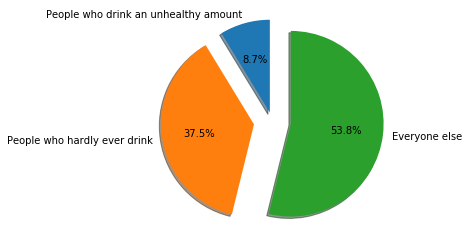

In [105]:
labels = 'People who drink an unhealthy amount', 'People who hardly ever drink', 'Everyone else'
sizes = [91, 391, 562]
explode = (0.1, 0.2, 0.2) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [223]:
st['alc'] = st['Dalc'] + st['Walc']

## Jon Abbot

### Out of the heavy drinkers, there tends to be a male majority

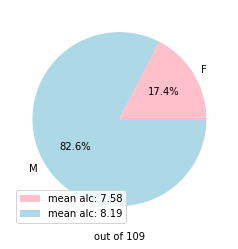

In [224]:
alc_cutoff = 6
sex_labels = ['F', 'M']
sex_colors = ['pink', 'lightblue']
male_alc = st[(st['sex'] == 'M') & (st['alc'] > alc_cutoff)]
fema_alc = st[(st['sex'] == 'F') & (st['alc'] > alc_cutoff)]
sex_sizes = [ len(fema_alc), len(male_alc) ]
plt.pie(sex_sizes, colors=sex_colors, labels=sex_labels, 
        autopct='%1.1f%%')
plt.legend([
    f'mean alc: {fema_alc.alc.mean():.2f}', 
    f'mean alc: {male_alc.alc.mean():.2f}'])
plt.xlabel(f'out of { sum(sex_sizes) }')
plt.show()

### Higher variance for females that drink. Females who drink the most tend to be younger. 
### Males tend to stay constant in their drinking habits. Males who drink the least tend to be younger. 

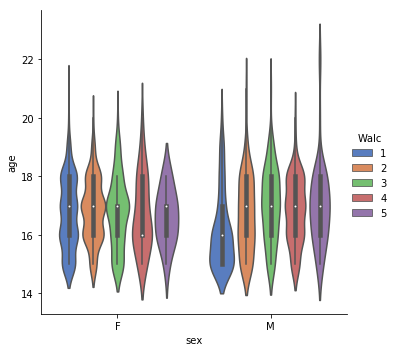

In [226]:
b = sns.catplot(x="sex", y="age", hue='Walc', data=stuviz, kind="violin", palette="muted" )

### Students tend to stay constant in terms of their exam performance.

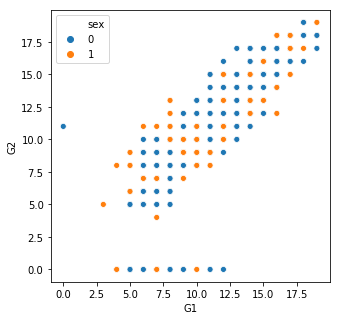

In [107]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = students['G1'],y = students['G2'],hue =students['sex'])

### Students who study more have less absences

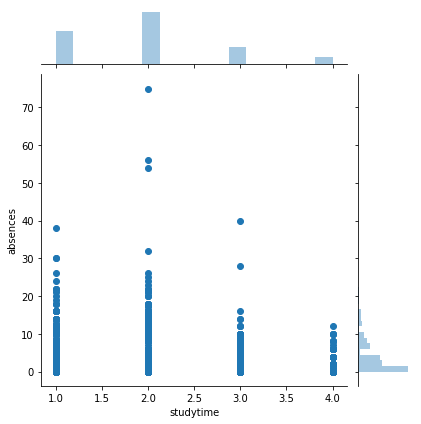

In [108]:
jp = sns.jointplot(x="studytime", y="absences", data=stuviz)

### People who drink a high amount have the lowest grades on average. 

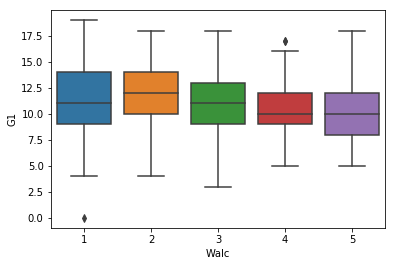

In [109]:
sns.boxplot(x='Walc',y='G1',data=students)

### Oddly, even if a student drinks five times a day if he has a mother he can score well

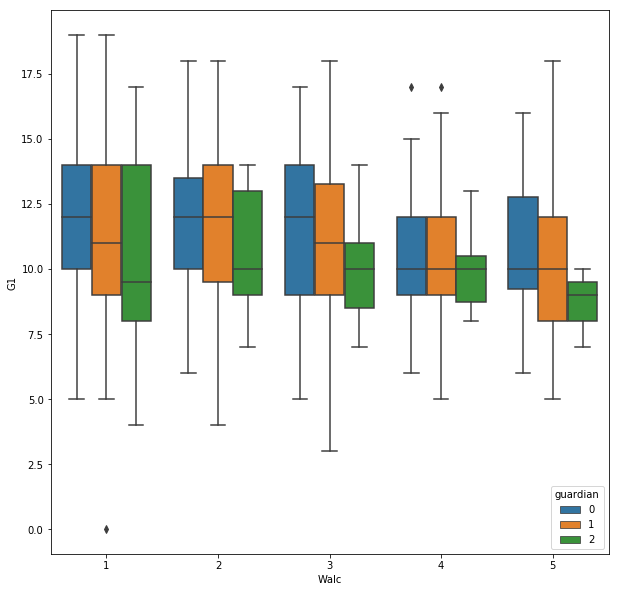

In [110]:
# parenting and drinking
plt.figure(figsize=(10,10))
sns.boxplot(x='Walc',y='G1',data=students,hue='guardian')

### If a student drinks once a week it doesn't affect his grade as badly as a student that drinks more than 3 times a week

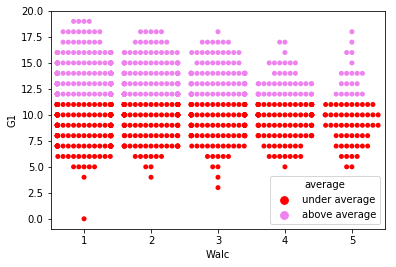

In [111]:
ave = sum(students.G1)/float(len(students))
students['ave_line'] = ave
students['average'] = ['above average' if i > ave else 'under average' for i in students.G1]
sns.swarmplot(x='Walc', y = 'G1', hue = 'average',data= students,palette={'above average':'violet', 'under average': 'red'})

## Alvin Alaphat

## Machine Learning Model
### we weighted the weekday drinking more than the weekend drinking based on the assumption that day drinking leads to a much higher chance of alcoholism

In [112]:
students['alcoholic'] = students['Dalc'] * 10 + students['Walc'] * 2
students.drop(['Walc','Dalc', 'ave_line', 'average'], axis=1, inplace=True)

In [159]:
X, y = students.drop('alcoholic',axis=1), students['alcoholic']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

In [115]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

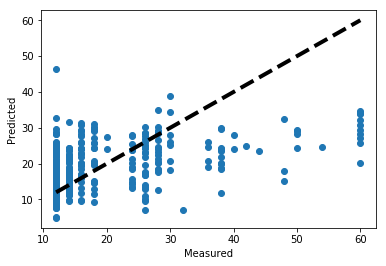

In [116]:
predicted = cross_val_predict(regr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Analysing the regression model

### Our RMSE (10.34) beats the Standard Deviation (10.92) but it could be improved with a neural network

In [118]:
print("RMSE Score: ", mean_squared_error(y_test, predicted)**.5)

RMSE Score:  10.341752252601626


In [119]:
students['alcoholic'].describe()

count    1044.000000
mean       19.511494
std        10.915647
min        12.000000
25%        12.000000
50%        14.000000
75%        24.500000
max        60.000000
Name: alcoholic, dtype: float64

### Trying a neural network (MLP Regressor)

#### - Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale the data (both training and test)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2),activation='relu')
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

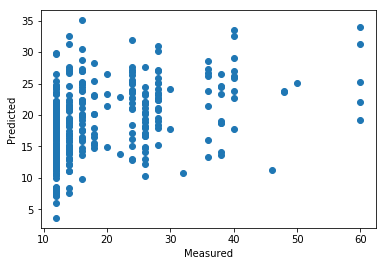

In [215]:
predicted = cross_val_predict(regr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [216]:
print("RMSE Score: ", mean_squared_error(y_test, predicted)**.5)

RMSE Score:  9.22282468208987


## Analysing the regression model

### MLP Regressor RMSE (9.2) beats the Linear Regression Model RMSE (10.3) and the Standard Deviation

## Alcoholic Calculator

In [135]:
print('---Alcoholic Calculator---')
print()
sex = d[input('Gender (M or F): ')]
age = int(input('Age: '))
area = d[input('Urban or Rural Location (U or R): ')]
famsize = d[input('Family Size (LE3 or GT3): ')]
pstat = d[input('Parents Living Together (A or T): ')]
medu = int(input('Mothers Education (0-4): '))
fedu = int(input('Fathers Education (0-4): '))
mjob = d[input("Mothers Job ('teacher','health','services','at_home','other'): ")]
fjob = d[input("Fathers Job ('teacher','health','services','at_home','other'): ")]
reason = d[input('Reason for school choice (home, reputation, course, other): ')]
guardian = d[input('Guardian (mother, father, other): ')]
traveltime = int(input('Hours spent traveling: '))
studytime = int(input('Hours spent studying per week: '))
failures = int(input('Number of class failures (1-4): '))
schoolsup = d[input('School support (yes or no): ')]
famsup = d[input('Family support (yes or no): ')]
paid = d[input('Take Extra Paid Classes (yes or no): ')]
activities = d[input('Extra Curricular Activities (yes or no): ')]
nursery = d[input('Attended Nursery School (yes or no): ')]
higher = d[input('Intend to go to college (yes or no): ')]
internet = d[input('Internet Access (yes or no): ')]
romantic = d[input('Romantic Relationship (yes or no): ')]
famrel = int(input('Family Relationship (1-5): '))
freetime = int(input('Freetime (1-5): '))
goout = int(input('Go out with friends (1-5): '))
health = int(input('Health (1-5): '))
absences = int(input('Number of Absences: '))
G1 = int(input('First exam grade (0-20): '))
G2 = int(input('Midterm exam grade (0-20): '))
G3 = int(input('Final exam grade (0-20): '))

---Alcoholic Calculator---

Gender (M or F): M
Age: 19
Urban or Rural Location (U or R): U
Family Size (LE3 or GT3): LE3
Parents Living Together (A or T): A
Mothers Education (0-4): 2
Fathers Education (0-4): 2
Mothers Job ('teacher','health','services','at_home','other'): teacher
Fathers Job ('teacher','health','services','at_home','other'): health
Reason for school choice (home, reputation, course, other): home
Guardian (mother, father, other): father
Hours spent traveling: 1
Hours spent studying per week: 3
Number of class failures (1-4): 2
School support (yes or no): yes
Family support (yes or no): no
Take Extra Paid Classes (yes or no): no
Extra Curricular Activities (yes or no): no
Attended Nursery School (yes or no): no
Intend to go to college (yes or no): no
Internet Access (yes or no): yes
Romantic Relationship (yes or no): no
Family Relationship (1-5): 2
Freetime (1-5): 2
Go out with friends (1-5): 3
Health (1-5): 2
Number of Absences: 7
First exam grade (0-20): 12
Midterm ex

In [136]:
asked = [sex, age, area, famsize, pstat, medu, fedu,mjob,
       fjob, reason, guardian, traveltime, studytime, failures,
       schoolsup, famsup, paid, activities, nursery, higher,
       internet, romantic, famrel, freetime, goout, health,
       absences, G1, G2, G3]

In [217]:
students.alcoholic.describe()

count    1044.000000
mean       19.511494
std        10.915647
min        12.000000
25%        12.000000
50%        14.000000
75%        24.500000
max        60.000000
Name: alcoholic, dtype: float64

### We plan to define these ranges as follows:

### ---Scores---
#### 12-18: Unlikely to develop alcoholism
#### 19-29: Moderate chance of alcoholism
#### 30-41: Likely to develop alcoholism
#### 42-53: High chance of developing alcoholism
#### 53-60: Get help

In [218]:
print("Your alcoholic score is: {:.0f}".format(regr.predict([asked])[0]))

Your alcoholic score is: 31


# Thanks for your time! We're open to questions.